# Mental Health in the Tech Industry
TODO meaningful text
years 2016 - 2019

## Setup

### Import, Style and options

In [790]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.options.mode.chained_assignment = None

### Database/Dataframe

In [791]:
# Establish connection to db
con = sqlite3.connect('mental_health.sqlite')
cur = con.cursor()

In [792]:
# Transform 'Question' table into dataframe
questions = pd.read_sql_query("SELECT * FROM Question", con)

In [793]:
# Transform 'Answer' table into dataframe
df = pd.read_sql_query("SELECT * FROM Answer WHERE NOT SurveyID=2014", con)

In [794]:
# Change 'SurveyID' column into 'Year'
df.rename(columns={'SurveyID': 'Year'}, inplace = True)

### Functions

In [795]:
def get_valid_answers(question_id):
    return df[(df['QuestionID'] == question_id) & (df['AnswerText'] != '-1')]

In [796]:
def append_count_in_percent(grouped_df):
    return (grouped_df['Count'] / grouped_df['Count'].sum())*100 

In [797]:
def append_count_in_percent_by_group(grouped_df, group_by_value):
    return (grouped_df['Count'] / grouped_df.groupby(group_by_value)['Count'].transform('sum'))*100

## Question catalogue

In [798]:
# Print all questions with id
questions

,questiontext,questionid
0,What is your age?,1
1,What is your gender?,2
2,What country do you live in?,3
3,"If you live in the United States, which state or territory do you live in?",4
4,Are you self-employed?,5
5,Do you have a family history of mental illness?,6
6,Have you ever sought treatment for a mental health disorder from a mental health professional?,7
7,How many employees does your company or organization have?,8
8,Is your employer primarily a tech company/organization?,9
9,Does your employer provide mental health benefits as part of healthcare coverage?,10


In [799]:
# Q1: "What is your age?"
q1 = get_valid_answers(1)
q1.rename(columns={'AnswerText': 'Age'}, inplace = True)

In [800]:
# Q2: "What is your gender?"
q2 = get_valid_answers(2)
q2.rename(columns={'AnswerText': 'Gender'}, inplace = True)

In [801]:
# Q3: "What country do you live in?"
q3 = get_valid_answers(3)
q3.rename(columns={'AnswerText': 'Country'}, inplace = True)

In [802]:
# Q5: "Are you self-employed?"
q5 = get_valid_answers(5)
q5.rename(columns={'AnswerText': 'Self_employed'}, inplace = True)

In [803]:
# Q13: "Is your primary role within your company related to tech/IT?"
q13 = get_valid_answers(13)
q13.rename(columns={'AnswerText': 'Primarily_IT'}, inplace = True)

In [804]:
# Q32: "Have you had a mental health disorder in the past?"
q32 = get_valid_answers(32)
q32.rename(columns={'AnswerText': 'Had_disorder'}, inplace = True)

In [805]:
# Q33: "Do you currently have a mental health disorder?"
q33 = get_valid_answers(33)
q33.rename(columns={'AnswerText': 'Has_disorder'}, inplace = True)

In [806]:
# Q118: "Do you work remotely?"
q118 = get_valid_answers(118)
q118.rename(columns={'AnswerText': 'Remote_work'}, inplace = True)

## Descriptive statistics

### Q1: Age distribution

In [807]:
# Drop impossible/unlikely values
q1['Age'] = pd.to_numeric(q1['Age'])
q1.drop(q1[q1.Age < 15].index, inplace=True)
q1.drop(q1[q1.Age > 74].index, inplace=True)

In [808]:
q1.describe()

,Age,Year,UserID,QuestionID
count,2952.000000,2952.000000,2952.000000,2952.0
mean,34.600949,2016.894648,2739.562669,1.0
std,8.270337,1.044298,853.865598,0.0
min,15.000000,2016.000000,1261.000000,1.0
25%,29.000000,2016.000000,2001.750000,1.0
50%,33.000000,2017.000000,2739.500000,1.0
75%,39.000000,2018.000000,3479.250000,1.0
max,74.000000,2019.000000,4218.000000,1.0


In [809]:
# Group and count by age
q1_by_age = q1.groupby('Age').size().reset_index(name='Count')
q1_by_age['%'] = append_count_in_percent(q1_by_age)

[Text(0.5, 1.0, 'What is your age?')]

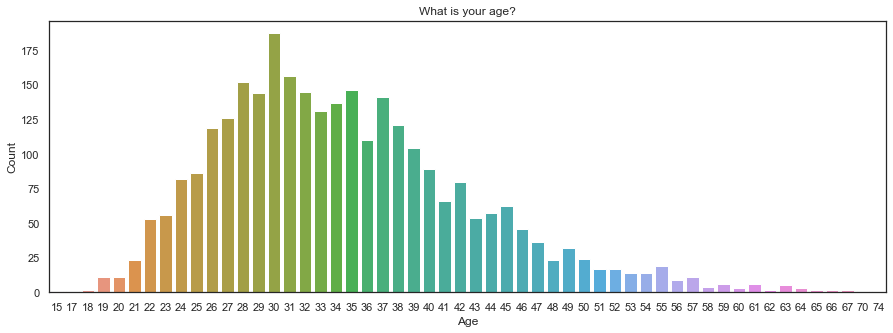

In [810]:
# Age distribution overall, visualized as bar chart
plt.subplots(figsize=(15, 5))
age_barplot = sns.barplot(x = 'Age', y = 'Count', data = q1_by_age)
age_barplot.set(title='What is your age?')


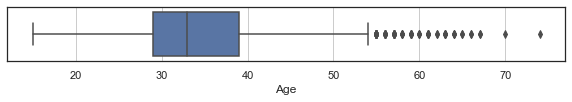

In [811]:
# Age distribution overall, visualized as box plot
plt.subplots(figsize=(10, 1))
age_boxplot = sns.boxplot(x=q1.Age)
age_boxplot.xaxis.grid(True)


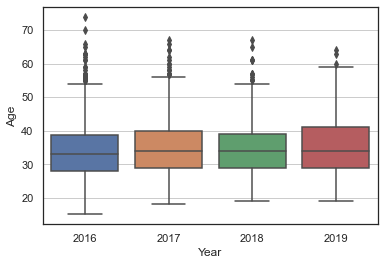

In [812]:
# Age distribution by year, visualized as box plot
age_boxplot_2 = sns.boxplot(x=q1.Year, y=q1.Age)
age_boxplot_2.yaxis.grid(True)

### Q2: Gender distribution

In [813]:
# Capitalize all entries
q2.Gender = q2.Gender.str.capitalize()

In [814]:
# Change non-"Male" and non-"Female" answer to "Other"
q2['Gender'] = np.where(((q2.Gender != 'Male') & (q2.Gender != 'Female')), 'Other', q2.Gender)


In [815]:
# Group and count answers by year
q2_by_year = q2.groupby('Year').size().reset_index(name='Count')
q2_by_year['%'] = append_count_in_percent(q2_by_year)
q2_by_year

,Year,Count,%
0,2016,1430,48.738923
1,2017,743,25.323790
2,2018,414,14.110429
3,2019,347,11.826858


In [816]:
# Group and count answers by gender
q2_by_gender = q2.groupby('Gender').size().reset_index(name='Count') 
q2_by_gender['%'] = append_count_in_percent(q2_by_gender)
q2_by_gender

,Gender,Count,%
0,Female,777,26.482618
1,Male,2052,69.938650
2,Other,105,3.578732


In [817]:
# Group and count answers by year & gender
q2_by_gender_and_year = q2.groupby(['Gender', 'Year']).size().reset_index(name='Count') 
q2_by_gender_and_year['%'] = append_count_in_percent_by_group(q2_by_gender_and_year, 'Year')
q2_by_gender_and_year

,Gender,Year,Count,%
0,Female,2016,336,23.496503
1,Female,2017,218,29.340511
2,Female,2018,125,30.193237
3,Female,2019,98,28.242075
4,Male,2016,1057,73.916084
5,Male,2017,502,67.563930
6,Male,2018,266,64.251208
7,Male,2019,227,65.417867
8,Other,2016,37,2.587413
9,Other,2017,23,3.095559


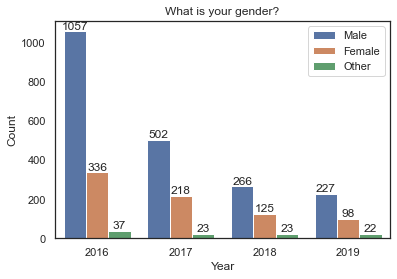

In [818]:
# Gender distribution, visualized
gender_barplot = sns.barplot(x = 'Year', y = 'Count', hue = 'Gender', data = q2_by_gender_and_year, hue_order=['Male', 'Female', 'Other'])
gender_barplot.set(title='What is your gender?')

# add labels to bars
for container in gender_barplot.containers:
    gender_barplot.bar_label(container)

# move hue box (to remove hue text)
gender_barplot.legend(bbox_to_anchor= (1,1))

### Q3: Origin distribution

In [819]:
# Participation by country
q3_by_country = q3.groupby('Country').size().reset_index(name='Count')
q3_by_country['%'] = append_count_in_percent(q3_by_country)
print('Number of countries: ' + str(len(q3_by_country.index)) )

Number of countries: 73


In [820]:
# Top 10 country participation
q3_by_country_top_10 = q3_by_country.nlargest(10, 'Count')
q3_by_country_top_10.sort_values('Count', ascending=False)

,Country,Count,%
69,United States of America,1853,62.686062
68,United Kingdom,297,10.047361
12,Canada,127,4.296346
26,Germany,91,3.078484
47,Netherlands,71,2.401894
3,Australia,51,1.725304
33,India,40,1.353180
24,France,38,1.285521
9,Brazil,31,1.048714
62,Spain,25,0.845737


### Q5: Self-employment ratio

In [821]:
# Change: 1 -> Yes, 0 -> No
q5['Self_employed'] = np.where((q5.Self_employed == '1'), 'Yes', q5.Self_employed)
q5['Self_employed'] = np.where((q5.Self_employed == '0'), 'No', q5.Self_employed)

In [822]:
# Group and count by answer
q5_by_answer = q5.groupby('Self_employed').size().reset_index(name='Count')
q5_by_answer['%'] = append_count_in_percent(q5_by_answer)
q5_by_answer

,Self_employed,Count,%
0,No,2454,82.96146
1,Yes,504,17.03854


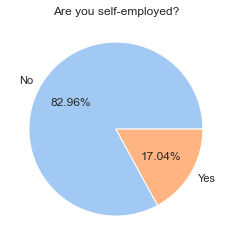

In [823]:
# Self-employed, visualized
plt.pie(q5_by_answer['%'], labels=q5_by_answer['Self_employed'], colors = sns.color_palette('pastel'), autopct='%.2f%%')
plt.title('Are you self-employed?')
plt.show()

### Q13: Primary role in company

## Hypotheses

### Die Häufigkeit psychischer Erkrankungen nimmt jährlich zu

In [824]:
# Standardize answers and drop non-relevant ones
q33['Has_disorder'] = np.where((q33.Has_disorder == 'Maybe'), 'Possibly', q33.Has_disorder)

In [825]:
# Group and count by Answer and Year
q33_by_answer_and_year = q33.groupby(['Has_disorder', 'Year']).size().reset_index(name='Count')
q33_by_answer_and_year['%'] = append_count_in_percent_by_group(q33_by_answer_and_year, 'Year')
q33_by_answer_and_year

,Has_disorder,Year,Count,%
0,Don't Know,2017,66,8.730159
1,Don't Know,2018,32,7.673861
2,Don't Know,2019,26,7.386364
3,No,2016,531,37.055129
4,No,2017,222,29.365079
5,No,2018,112,26.858513
6,No,2019,104,29.545455
7,Possibly,2016,327,22.819260
8,Possibly,2017,144,19.047619
9,Possibly,2018,82,19.664269


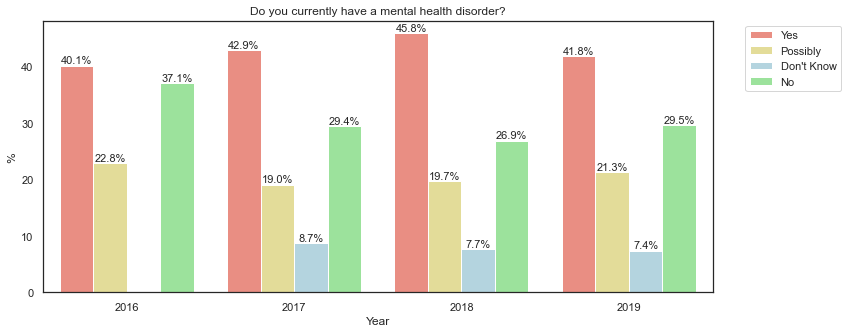

In [826]:
# Currently affected by a mental disorder, visualized
plt.subplots(figsize=(12, 5))
has_disorder_barplot = sns.barplot(x = 'Year', y = '%', hue = 'Has_disorder', data = q33_by_answer_and_year, \
    hue_order=['Yes', 'Possibly', 'Don\'t Know', 'No'], palette=['salmon', 'khaki', 'lightblue','lightgreen'])
has_disorder_barplot.set(title='Do you currently have a mental health disorder?')

for container in has_disorder_barplot .containers:
    has_disorder_barplot.bar_label(container, fmt='%.1f%%', fontsize=11)

# move hue box
has_disorder_barplot.legend(bbox_to_anchor= (1.2,1))

### Menschen in der Tech-Industrie sind häufiger von einer psychischen Erkrankung betroffen

### Männer sind häufiger von psychischen Erkrankungen betroffen als Frauen

### Selbstständige sind häufiger von psychischen Erkrankungen betroffen

In [827]:
## Self-employed and had metal disorder
q5_q32 = pd.merge(q5, q32, on='UserID', how='inner')
q5_q32
#Add Count and %
self_employed_had_mental_disorder = q5_q32.groupby(['Self_employed', 'Had_disorder']).size().reset_index(name='Count')
temp = self_employed_had_mental_disorder['Count'].sum()
self_employed_had_mental_disorder['%'] = (self_employed_had_mental_disorder['Count'] / temp)*100
self_employed_had_mental_disorder


,Self_employed,Had_disorder,Count,%
0,No,Don't Know,94,3.194020
1,No,Maybe,184,6.252124
2,No,No,762,25.891947
3,No,Possibly,235,7.985049
4,No,Yes,1167,39.653415
5,Yes,Don't Know,15,0.509684
6,Yes,Maybe,62,2.106694
7,Yes,No,134,4.553177
8,Yes,Possibly,40,1.359157
9,Yes,Yes,250,8.494733


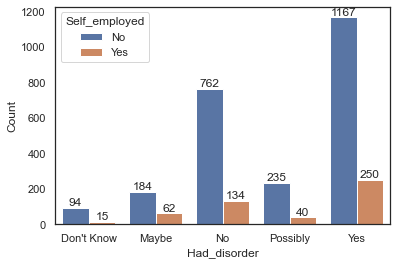

In [828]:
#self employed and had mental disorder, visualized
ax = sns.barplot(x= 'Had_disorder', y='Count', hue='Self_employed', data= self_employed_had_mental_disorder)

#add labels to bars
for container in ax.containers:
    ax.bar_label(container)

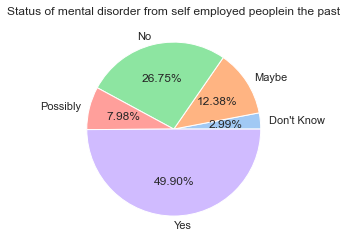

In [829]:
#show self employed 
self_employed = self_employed_had_mental_disorder.drop(self_employed_had_mental_disorder[self_employed_had_mental_disorder.Self_employed == 'No'].index)
plt.pie(self_employed['%'],labels=self_employed['Had_disorder'], colors=sns.color_palette('pastel'), autopct='%.2f%%')
plt.title('Status of mental disorder from self employed peoplein the past')
plt.show()

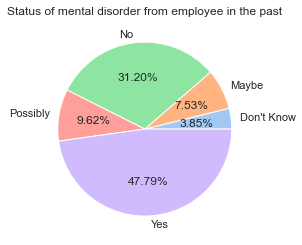

In [830]:
#show employee
employee = self_employed_had_mental_disorder.drop(self_employed_had_mental_disorder[self_employed_had_mental_disorder.Self_employed == 'Yes'].index)
plt.pie(employee['%'],labels=employee['Had_disorder'], colors=sns.color_palette('pastel'), autopct='%.2f%%')
plt.title('Status of mental disorder from employee in the past')
plt.show()

In [831]:
## Self-employed and had metal disorder
q5_q33 = pd.merge(q5, q33, on='UserID', how='inner')
#Add Count and % Column
self_employed_has_mental_disorder = q5_q33.groupby(['Self_employed', 'Has_disorder']).size().reset_index(name='Count')
self_employed_has_mental_disorder['%'] = append_count_in_percent_by_group(self_employed_has_mental_disorder, 'Self_employed')
self_employed_has_mental_disorder

,Self_employed,Has_disorder,Count,%
0,No,Don't Know,101,4.115729
1,No,No,813,33.129584
2,No,Possibly,516,21.026895
3,No,Yes,1024,41.727791
4,Yes,Don't Know,23,4.563492
5,Yes,No,156,30.952381
6,Yes,Possibly,112,22.222222
7,Yes,Yes,213,42.261905


Balkendiagramm aus den Piecharts machen 
Vielleicht nochmal heraussuchen, ob man sehen kann, dass sie früher schon in der Tech industry gearbeitet haben

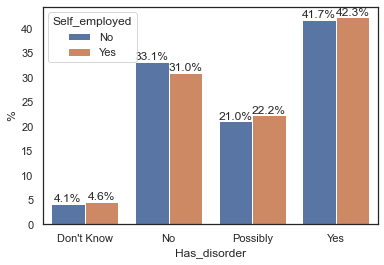

In [832]:
#show self employed that has mental disorder
ax = sns.barplot(x='Has_disorder', y='%', hue='Self_employed', data= self_employed_has_mental_disorder)

#add labels to bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')
# plt.pie(self_employed['%'],labels=self_employed['Has_disorder'], colors=sns.color_palette('pastel'), autopct='%.2f%%')
# plt.title('Status of mental disorder from self employed people right now')
# plt.show()

In [833]:
#people who had and still have a mental disorder
duplicates = pd.merge(q32, q33, on="UserID", how='inner')


### Menschen im Home-Office sind häufiger von psychischen Erkrankungen betroffen als Angestellte

### Eine psychische Erkrankung wird eher mit Kollgegen besprochen als mit den Vorgesetzten